# Build network based on kinase-phosphosite interactions

This notebook provides the code to create a network based on kinase-substrate interactions and the annotated effect of phosphorylation (based on PhosphositePlus) on the activity of the substrate.

In [1]:
%%time
from omniflow_project.core.network import Network
from omniflow_project._visual.visualize_network import NetworkVisualizer
from omniflow_project._inputs.resources import Resources
from omniflow_project._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

CPU times: user 2.2 s, sys: 379 ms, total: 2.58 s
Wall time: 2.63 s


## 1. Specify kinase-substrate interaction file and phosphosite effect annotation

In this example, both files we utilize are from PhosphositePlus.

In [2]:
kinase_int_file = ("../omniflow_project/_data/Kinase_Substrate_Dataset")
phospho_effect_file = ("../omniflow_project/_data/Regulatory_sites")

## 2. Add interactions as a resource database

The *_process_psp_interactions_* function parses the provided files to create an interaction database in the Omnipath format.

In [3]:
resources = Resources()
interactions = resources.process_psp_interactions(kinase_int_file, phospho_effect_file,"human", expand=True)
resources.add_database(interactions)

/home/eirini/anaconda3/envs/omniflow_env/lib/python3.10/site-packages/omniflow_project/_inputs/resources.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kinase_int_filtered['target'] = kinase_int_filtered['SUB_GENE'] + '_' + kinase_int_filtered['SUB_MOD_RSD']
/home/eirini/anaconda3/envs/omniflow_env/lib/python3.10/site-packages/omniflow_project/_inputs/resources.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phospho_effect_filtered['MOD_RSD'] = phospho_effect_filtered['MOD_RSD'].apply(
/home/ei

In [4]:
#inspect database
interactions

,source,target,is_directed,consensus_direction,consensus_stimulation,consensus_inhibition,is_stimulation,is_inhibition,curation_effort,references,sources
0,EIF2AK1,EIF2S1_S52,True,False,False,False,1,1,NaN,NaN,NaN
2,PRKCD,HDAC5_S259,True,False,False,False,1,1,NaN,NaN,NaN
3,PRKCD,PTPRA_S204,True,False,False,False,1,0,NaN,NaN,NaN
4,PRKCD,BCL2_S70,True,False,False,False,0,1,NaN,NaN,NaN
6,PRKCD,SLC9A1_S648,True,False,False,False,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
28983,CASP6_S257,CASP6,True,False,False,False,0,1,False,False,False
28984,TP53_S392,TP53,True,False,False,False,1,0,False,False,False
28989,TP53_S15,TP53,True,False,False,False,1,1,False,False,False
28991,STING1_S366,STING1,True,False,False,False,1,0,False,False,False


## 3. Define a set of phosphosites we are interested in

In [5]:
genes = ['AKT1S1_T246', 'GSK3B_S9', 'AKT1_S473', 'HSPB1_S78', 'HSPB1_S82', 'MAPK14_T180', 'MAPK14_Y182', 'MAP2K1_S218', 'MAP2K1_S222', 'RPS6KA1_S380', 'MTOR_S2448', 'JUN_S63', 'MAPK3_T202', 'MAPK3_Y204']

## 4. Build network

In [6]:
%%time
new_net1 = Network(genes, resources=resources.interactions)

CPU times: user 426 ms, sys: 32.1 ms, total: 458 ms
Wall time: 456 ms


In [7]:
%%time
new_net1.complete_connection(mode="ALL", maxlen=10, k_mean="extensive", only_signed=True, connect_node_when_first_introduced=True)

looking for paths in the network with length:  0  for node  AKT1S1_T246  and  GSK3B_S9
looking for paths in the network with length:  1  for node  AKT1S1_T246  and  GSK3B_S9
looking for paths in the network with length:  2  for node  AKT1S1_T246  and  GSK3B_S9
looking for paths in the network with length:  3  for node  AKT1S1_T246  and  GSK3B_S9
looking for paths in the network with length:  4  for node  AKT1S1_T246  and  GSK3B_S9
looking for paths in the network with length:  5  for node  AKT1S1_T246  and  GSK3B_S9
looking for paths in the network with length:  6  for node  AKT1S1_T246  and  GSK3B_S9
looking for paths in the network with length:  7  for node  AKT1S1_T246  and  GSK3B_S9
looking for paths in the network with length:  8  for node  AKT1S1_T246  and  GSK3B_S9
looking for paths in the network with length:  9  for node  AKT1S1_T246  and  GSK3B_S9
looking for paths in the network with length:  10  for node  AKT1S1_T246  and  GSK3B_S9
i_search =  4
Looking for paths with lengt

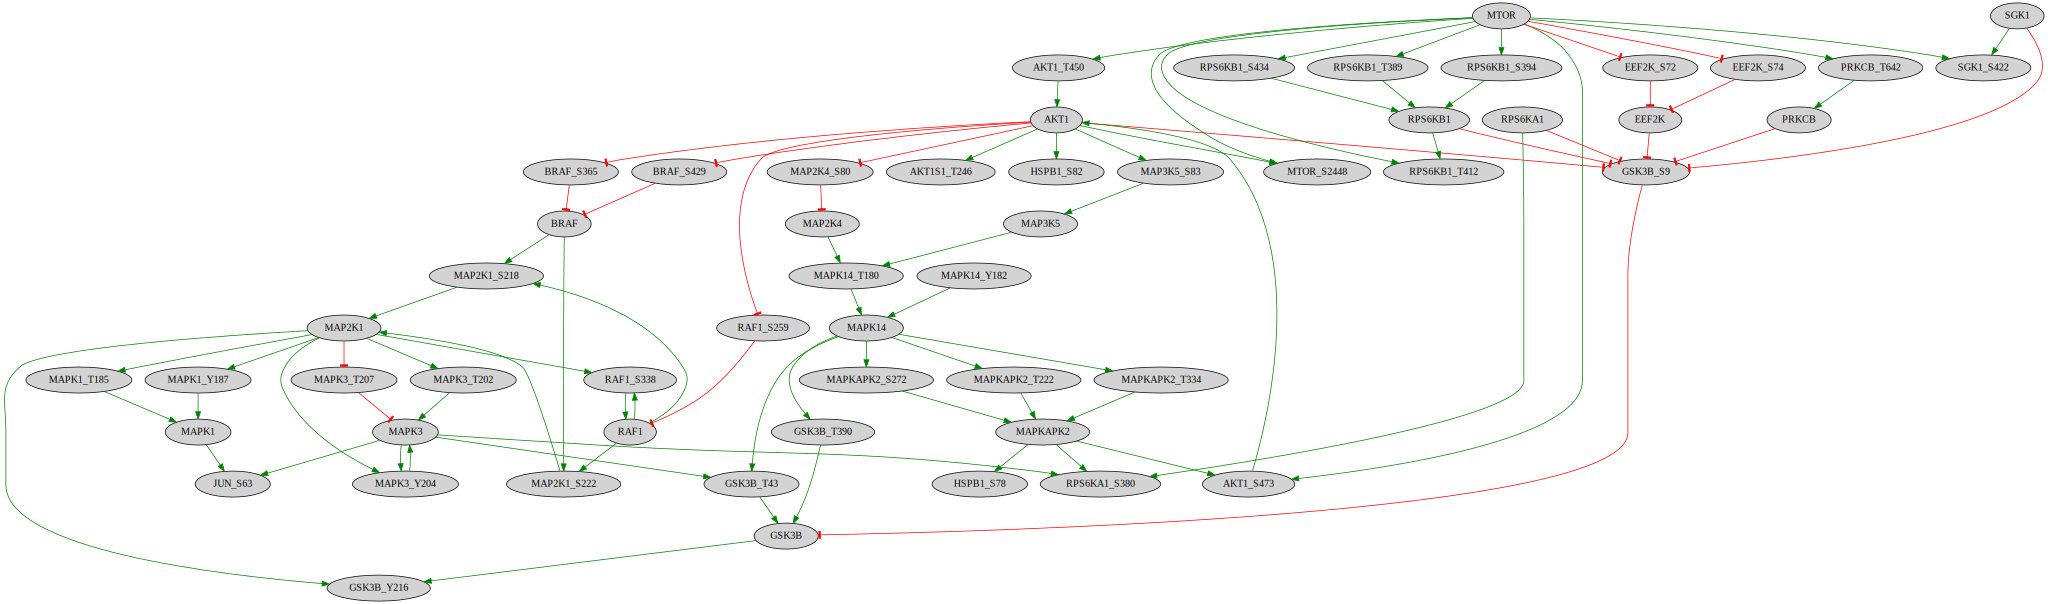

In [8]:
visualizer1 = NetworkVisualizer(new_net1, color_by='effect')
visualizer1.render()